## Project 1 (Due 2/17)

The goal of the first project is to do some wrangling, EDA, and visualization, and generate sequences of values. We will focus on:

- CDC National Health and Nutritional Examination Survey (NHANES, 1999-2000): https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=1999
- CDC Linked Mortality File (LMF, 1999-2000): https://www.cdc.gov/nchs/data-linkage/mortality-public.htm

NHANES is a rich panel dataset on health and behavior, collected bi-yearly from around 1999 to now. We will focus on the 1999 wave, because that has the largest follow-up window, providing us with the richest mortality data. The mortality data is provided by the CDC Linked Mortality File. 

The purpose of the project is to use $k$-NN to predict who dies (hard or soft classification) and how long they live (regression).

### Day 1: Wrangling and EDA (40/100 pts)

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as `lmf_parsed.cav`. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

Second, download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

``` python
import pandas as pd
mdf = pd.read_csv('lmf_parsed.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable
```

Third, the variables `ELIGSTAT`, `MORTSTAT`, `PERMTH_INT`, and `RIDAGEEX` are particularly important. Look them up in the documentation and clearly describe them. (5/100 pts.)

Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (`MORTSTAT`) and life expectancy (`PERMTH_INT`). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use `.merge` to combine your data into one complete dataframe. Document missing values. (5/100 pts)

Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using. (20/100 pts)

In [4]:
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') 
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") 
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") 

   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

**Exploring variables ELIGSTAT, MORTSTAT, PERMTH_INT, RIDAGEEX**

ELIGSTAT:
- 'Eligibility Status for Mortality Follow-up'
- Possible values are:
  - 1 = "Eligible"
  - 2 = "Under age 18, not available for public release"
  - 3 = "Ineligible"
- Variable type = Num
- Information:
  - Survey participants are defined as ineligible for mortality linkage if they had insufficient identifying data
  - All survey participants from the survey files are included on the linked mortality files regardless of linkage eligibility

MORTSTAT:
- 'Final Mortality Status'
- Possible values are:
  - 0 = "Assumed Alive"
  - 1 = "Assumed deceased"
  - . = "Ineligible or under age 18"
- Variable type = Num
- Information:
  - The MORTSTAT variable is the final determination of vital status and should be used as an outcome variable to calculate survival
  - Each survey participant who is eligible for mortality follow-up is assigned a vital status code (0=Assumed alive, 1=Assumed deceased) 

PERMTH_INT
- 'Number of Person Months of Follow-up from NHANES interview date'
- Range of Values:
  - 0-374 = Months
  - . = Ineligible, under age 18, or assumed alive
- Variable type = Num
- Information:
  - Number of person-months of follow-up from NHANES interview date
  - Participants who are assumed alive are assigned the number of person months at the end of the mortality period, December 31, 2019
  - Only applicable for NHANES III and continuous NHANES (1999-2018) 

RIDAGEEX:
- 'Exam Age in Months - Recode'
- Best age in months at date of examination for individuals under 85 years of age at screening
- Both males and females 0 YEARS - 84 YEARS
- Range of values:
  - 0 to 1019 = Months
  - . = Missing
- Variable Type = Num
- Information:
  - Age in months at MEC examination, provided only for those who were less than 85 years of age (RIDAGEYR < 85) at the time of the household screening interview
  - RIDAGEEX was not calculated for individuals with an imputed age

In [5]:
food = pd.read_sas("DRXTOT.xpt", format="xport") 
print(food.head())
X = df.merge(food, on="SEQN", how="left") 
X.head()

   SEQN         WTDRD1       WTDR4YR  DRDDRSTS  DRDEXMER  DRASCST2  DRDAINMD  \
0   1.0   14809.893854   6066.128663       1.0      19.0       1.0       1.0   
1   2.0   26899.708892  14921.934292       1.0      72.0       1.0       1.0   
2   3.0   34388.840334  15866.447640       1.0      70.0       1.0       1.0   
3   4.0    7159.829389   3218.099911       1.0      72.0       1.0       1.0   
4   5.0  127746.359176  58973.611131       1.0      65.0       1.0       1.0   

   DRDINTMD  DRDDAY  DRALANG  ...  DRQ370QQ  DRD370R  DRQ370RQ  DRD370S  \
0       1.0     4.0      1.0  ...       NaN      2.0       NaN      2.0   
1       1.0     6.0      1.0  ...       NaN      2.0       NaN      2.0   
2       1.0     7.0      2.0  ...       NaN      NaN       NaN      NaN   
3       1.0     6.0      1.0  ...       NaN      2.0       NaN      2.0   
4       1.0     2.0      1.0  ...       NaN      NaN       NaN      NaN   

   DRQ370SQ  DRD370T  DRQ370TQ  DRD370U  DRQ370UQ  DRD370V  
0      

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,DRQ370QQ,DRD370R,DRQ370RQ,DRD370S,DRQ370SQ,DRD370T,DRQ370TQ,DRD370U,DRQ370UQ,DRD370V
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We selected this data because we were curious about how total nutrient intake impacts mortality. If we are able to find clear patterns between nutrients and mortality, we will be able to know which food groups to steer clear of and what nutrients we should focus on getting/not getting.

In [6]:
print(X.isna().any())
missing = X.isna().sum().to_frame()
missing

SEQN        False
SDDSRVYR    False
RIDSTATR    False
RIDEXMON     True
RIAGENDR    False
            ...  
DRD370T      True
DRQ370TQ     True
DRD370U      True
DRQ370UQ     True
DRD370V      True
Length: 283, dtype: bool


,0
SEQN,0
SDDSRVYR,0
RIDSTATR,0
RIDEXMON,683
RIAGENDR,0
...,...
DRD370T,4885
DRQ370TQ,9126
DRD370U,4885
DRQ370UQ,9591


As shown by the table above, there are many missing values in our Data Frame. 

These missing values are very prevalent in our third dataset, the one with nutrition data, so we will drop columns with all na vales.

In [7]:
empty_cols = X.columns[X.isna().all()]
empty_cols

Index([], dtype='str')

In [8]:
X.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIDEXMON',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDAGEEX',
 'RIDRETH1',
 'RIDRETH2',
 'DMQMILIT',
 'DMDBORN',
 'DMDCITZN',
 'DMDYRSUS',
 'DMDEDUC3',
 'DMDEDUC2',
 'DMDEDUC',
 'DMDSCHOL',
 'DMDMARTL',
 'DMDHHSIZ',
 'INDHHINC',
 'INDFMINC',
 'INDFMPIR',
 'RIDEXPRG',
 'RIDPREG',
 'DMDHRGND',
 'DMDHRAGE',
 'DMDHRBRN',
 'DMDHREDU',
 'DMDHRMAR',
 'DMDHSEDU',
 'WTINT2YR',
 'WTINT4YR',
 'WTMEC2YR',
 'WTMEC4YR',
 'SDMVPSU',
 'SDMVSTRA',
 'SDJ1REPN',
 'DMAETHN',
 'DMARACE',
 'WTMREP01',
 'WTMREP02',
 'WTMREP03',
 'WTMREP04',
 'WTMREP05',
 'WTMREP06',
 'WTMREP07',
 'WTMREP08',
 'WTMREP09',
 'WTMREP10',
 'WTMREP11',
 'WTMREP12',
 'WTMREP13',
 'WTMREP14',
 'WTMREP15',
 'WTMREP16',
 'WTMREP17',
 'WTMREP18',
 'WTMREP19',
 'WTMREP20',
 'WTMREP21',
 'WTMREP22',
 'WTMREP23',
 'WTMREP24',
 'WTMREP25',
 'WTMREP26',
 'WTMREP27',
 'WTMREP28',
 'WTMREP29',
 'WTMREP30',
 'WTMREP31',
 'WTMREP32',
 'WTMREP33',
 'WTMREP34',
 'WTMREP35',
 'WTMREP36',
 'WTMREP37',
 'WTMREP3

In [9]:
X = X.dropna(axis=1, how="all")
X.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,DRQ370QQ,DRD370R,DRQ370RQ,DRD370S,DRQ370SQ,DRD370T,DRQ370TQ,DRD370U,DRQ370UQ,DRD370V
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have now dropped 2 columns: DMAETHN and DMARACE

We can also hone in on a few variables of interest, which we have selected below. 

DRXIKCAL:
- Energy (kcal)
- Range: (0-9656.67)
- 557 missing values

DRXIPROT:
- Protein (gm)
- Range: (0-461.02)
- 557 missing values

DRXICARB:
- Carbohydrate (gm)
- Range: (0-1513.96)
- 557 missing values

DRXITFAT:
- Total fat (gm)
- Range: (0-428.23)
- 557 missing values

In [10]:
X_interesting = X.loc[:,['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT'] ]
X_interesting.head()

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
0,2,NaN,NaN,31.0,1358.88,31.96,250.36,27.24
1,1,1.0,177.0,926.0,2463.00,123.16,350.37,71.95
2,2,NaN,NaN,126.0,1517.69,40.19,233.63,49.94
3,2,NaN,NaN,23.0,1474.93,56.16,191.03,56.20
4,1,0.0,244.0,597.0,2658.14,97.13,253.98,114.52


### **EDA**:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<function matplotlib.pyplot.show(close=None, block=None)>

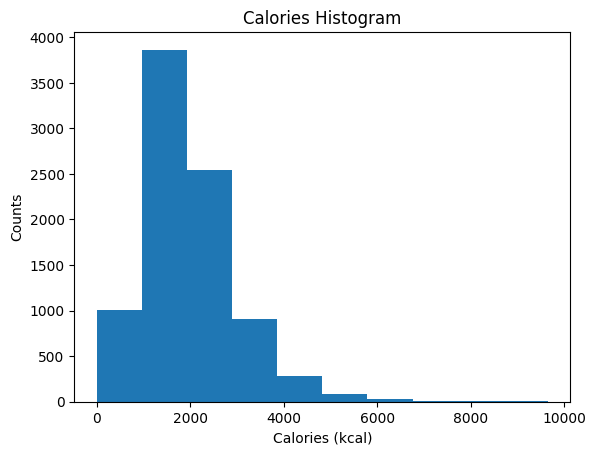

In [12]:
plt.hist(X_interesting['DRXTKCAL'])
plt.title("Calories Histogram")
plt.xlabel("Calories (kcal)")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

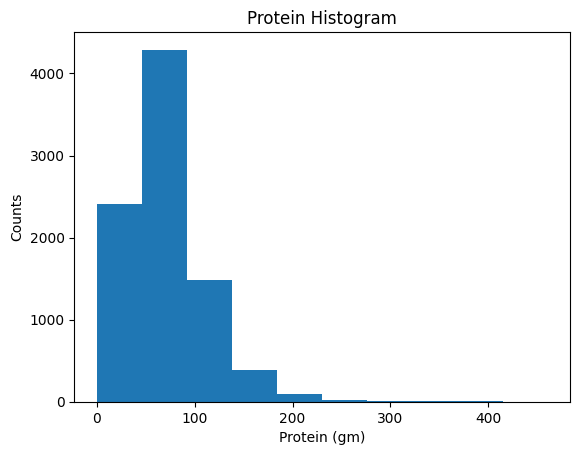

In [13]:
plt.hist(X_interesting['DRXTPROT'])
plt.title("Protein Histogram")
plt.xlabel("Protein (gm)")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

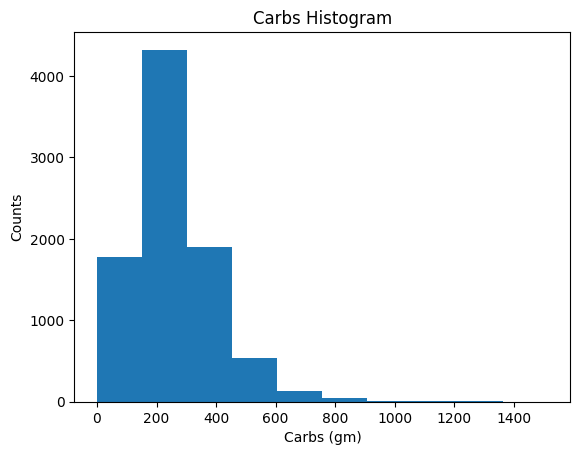

In [14]:
plt.hist(X_interesting['DRXTCARB'])
plt.title("Carbs Histogram")
plt.xlabel("Carbs (gm)")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

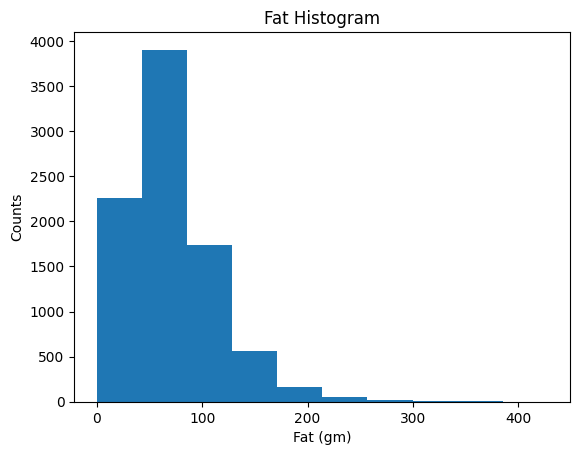

In [15]:
plt.hist(X_interesting['DRXTTFAT'])
plt.title("Fat Histogram")
plt.xlabel("Fat (gm)")
plt.ylabel("Counts")
plt.show

All of the histograms appear to be right-skewed

In [16]:
X_interesting['DRXTKCAL'].describe()	

count    8.725000e+03
mean     1.975533e+03
std      9.900975e+02
min      5.397605e-79
25%      1.304850e+03
50%      1.797800e+03
75%      2.440150e+03
max      9.656670e+03
Name: DRXTKCAL, dtype: float64

In [17]:
X_interesting['DRXTPROT'].describe()

count    8.725000e+03
mean     7.115863e+01
std      4.062756e+01
min      5.397605e-79
25%      4.402000e+01
50%      6.389000e+01
75%      8.938000e+01
max      4.610200e+02
Name: DRXTPROT, dtype: float64

In [18]:
X_interesting['DRXTCARB'].describe()

count    8.725000e+03
mean     2.586785e+02
std      1.362553e+02
min      5.397605e-79
25%      1.653400e+02
50%      2.351400e+02
75%      3.237300e+02
max      1.513960e+03
Name: DRXTCARB, dtype: float64

In [19]:
X_interesting['DRXTTFAT'].describe()

count    8.725000e+03
mean     7.201394e+01
std      4.284108e+01
min      5.397605e-79
25%      4.195000e+01
50%      6.363000e+01
75%      9.188000e+01
max      4.282300e+02
Name: DRXTTFAT, dtype: float64

In [20]:
var_list = 'ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT'
X_interesting.loc[:, var_list].corr(numeric_only=True)

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
ELIGSTAT,1.000000,NaN,NaN,-0.777590,-0.113181,-0.188492,-0.043750,-0.083597
MORTSTAT,NaN,1.000000,-0.823795,0.633499,-0.196089,-0.142729,-0.195624,-0.151387
PERMTH_INT,NaN,-0.823795,1.000000,-0.558842,0.172962,0.130214,0.170801,0.131422
RIDAGEEX,-0.777590,0.633499,-0.558842,1.000000,0.009288,0.105413,-0.046113,0.008153
DRXTKCAL,-0.113181,-0.196089,0.172962,0.009288,1.000000,0.807435,0.897563,0.872111
DRXTPROT,-0.188492,-0.142729,0.130214,0.105413,0.807435,1.000000,0.600659,0.765020
DRXTCARB,-0.043750,-0.195624,0.170801,-0.046113,0.897563,0.600659,1.000000,0.641143
DRXTTFAT,-0.083597,-0.151387,0.131422,0.008153,0.872111,0.765020,0.641143,1.000000


ELIGSTAT number of outliers: 0
MORTSTAT number of outliers: 0
PERMTH_INT number of outliers: 883
RIDAGEEX number of outliers: 0
DRXTKCAL number of outliers: 285
DRXTPROT number of outliers: 318
DRXTCARB number of outliers: 279
DRXTTFAT number of outliers: 291


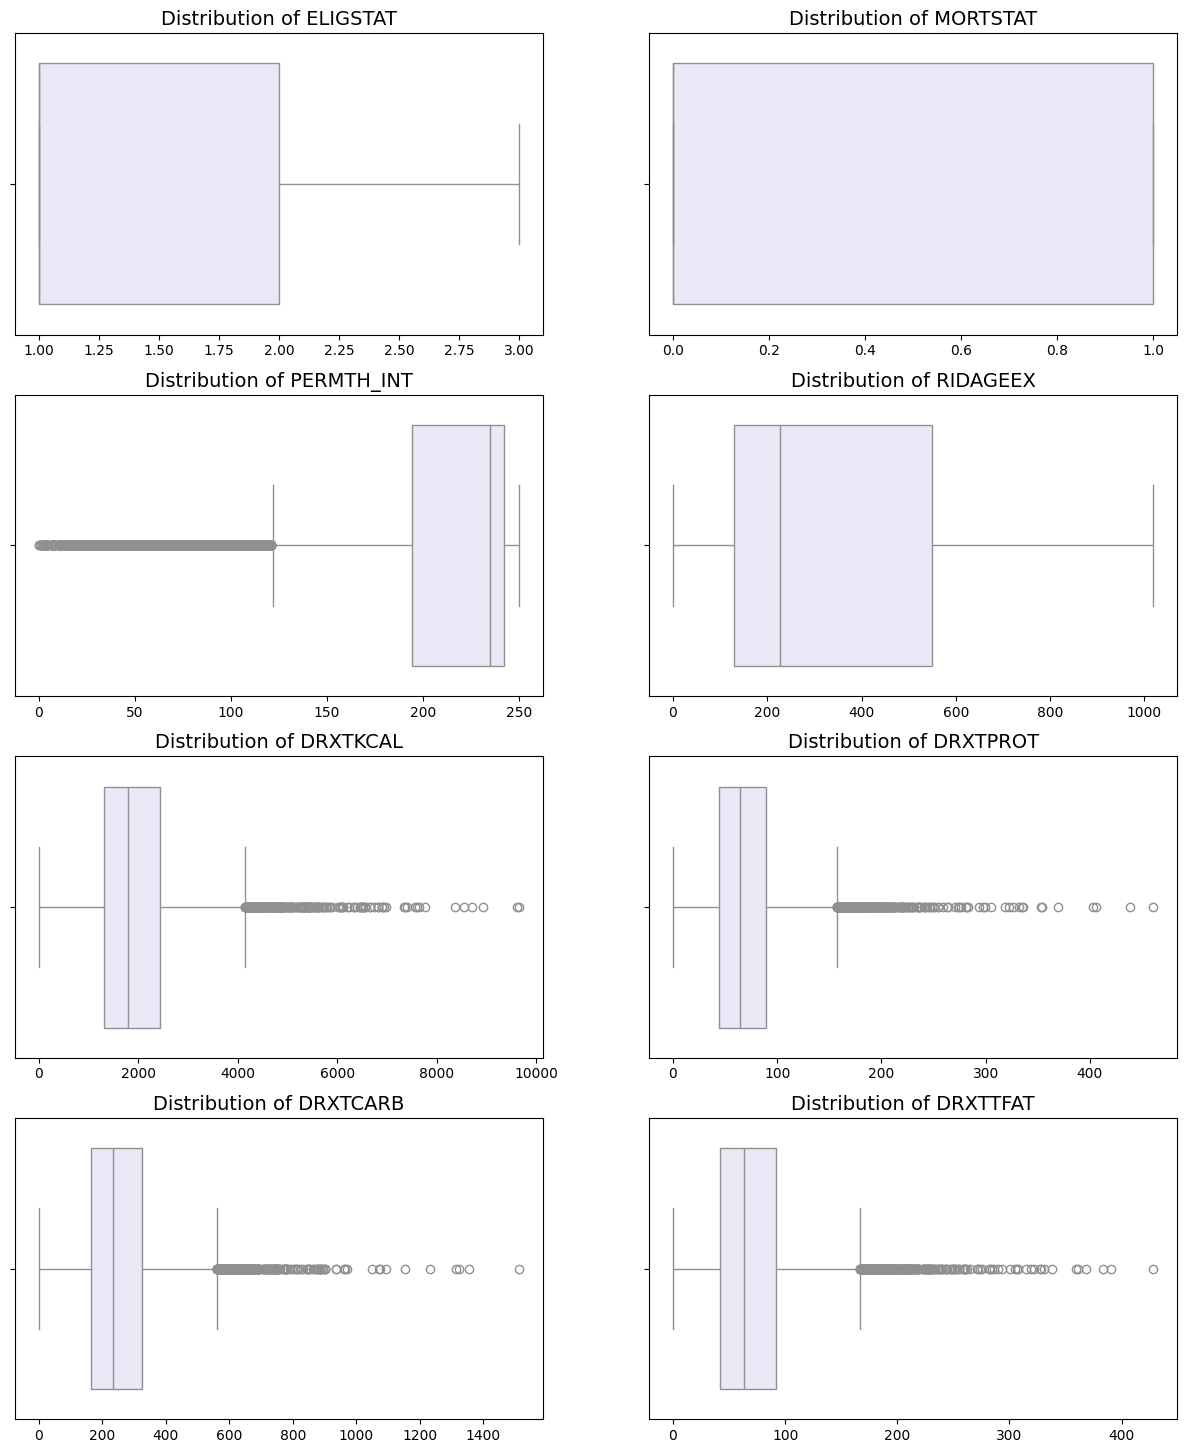

In [21]:
columns = ['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT']
fig, axes = plt.subplots(4, 2, figsize=(15, 18))
axes = axes.flatten()

for i, column in enumerate(columns):    
    sns.boxplot(
        x=X_interesting[column], 
        ax=axes[i], 
        color='lavender')
    axes[i].set_title(f"Distribution of {column}", fontsize=14)
    axes[i].set_xlabel("")

    Q1 = X_interesting[column].quantile(0.25)
    Q3 = X_interesting[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X_interesting[(X_interesting[column] < lower_bound) | (X_interesting[column] > upper_bound)]
    count = outliers.shape[0]
    
    print(f"{column} number of outliers: {count}")

plt.show()


In [22]:
print("MORTSTAT does not appear to be skewed.\nELIGSTAT, RIDAGEX, DRXTKCAL, DRXTPROT, DRXTCARB, and DRXTTFAT are right skewed. \nPERMTH_INT is left skewed.")

MORTSTAT does not appear to be skewed.
ELIGSTAT, RIDAGEX, DRXTKCAL, DRXTPROT, DRXTCARB, and DRXTTFAT are right skewed. 
PERMTH_INT is left skewed.


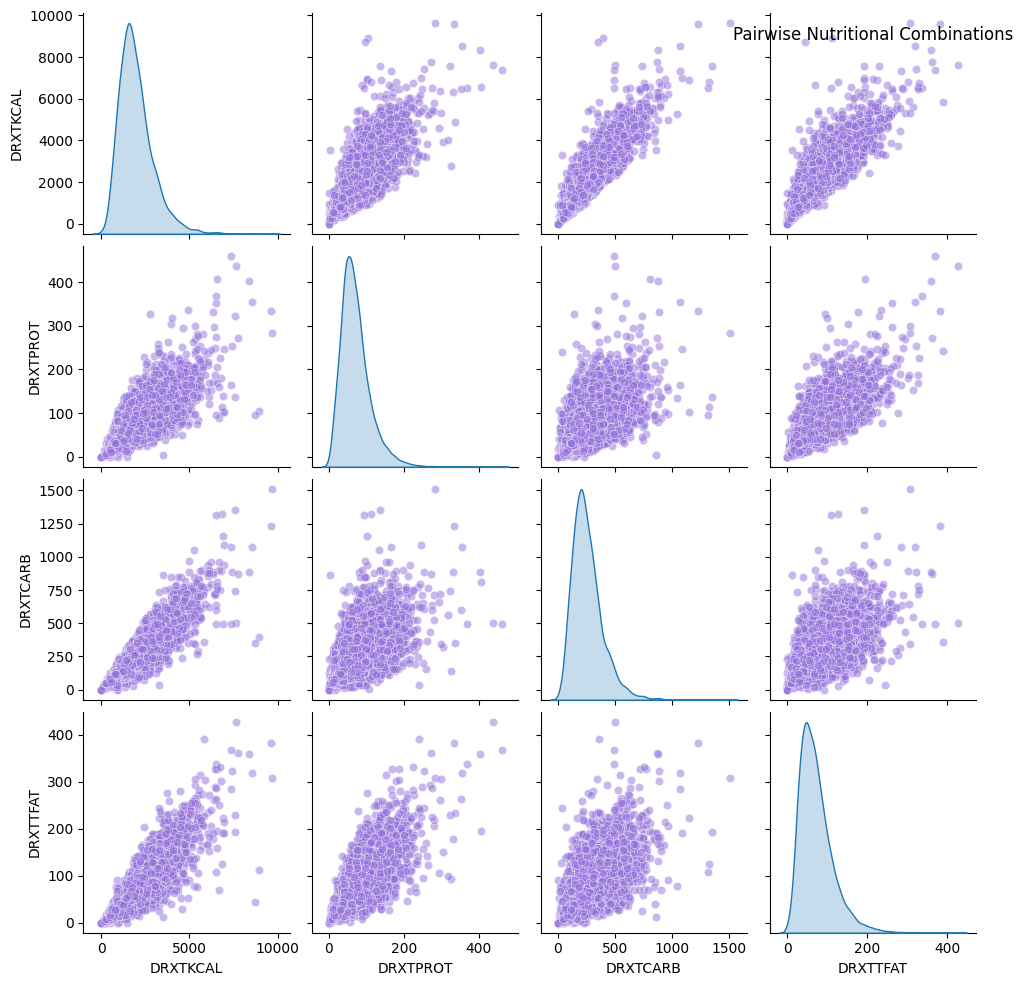

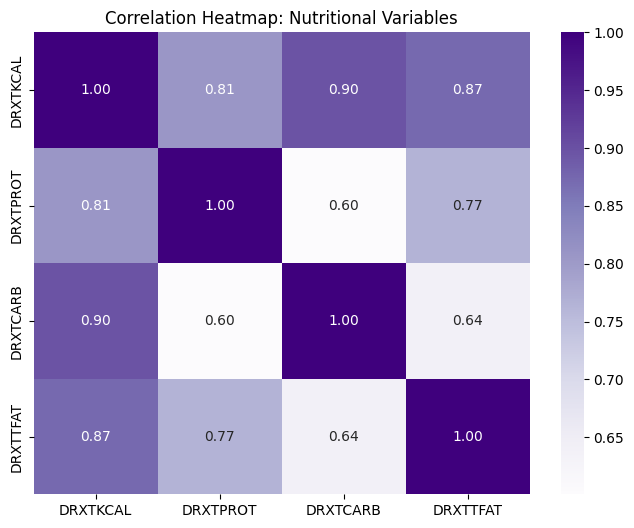

In [23]:
axes = axes.flatten()
columns2 = ['DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT']

pair_plot = sns.pairplot(X_interesting[columns2], diag_kind='kde', plot_kws={'alpha': 0.5, 'color': 'mediumpurple'})

plt.title("Pairwise Nutritional Combinations", y = 4)
plt.show()

correlation_matrix = X_interesting[columns2].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title("Correlation Heatmap: Nutritional Variables")
plt.show()

DRXTKCAL and DRXTCARB appear to have the highest correlation (0.90), followed by  DRXTKCAL and DRXTTFAT (0.87). 

DRXTPROT and DRXTCARB are the least correlated with a correlation of 0.60. The second least correlated are DRXTTFAT and DRXTCARB with a correlation of 0.64. 

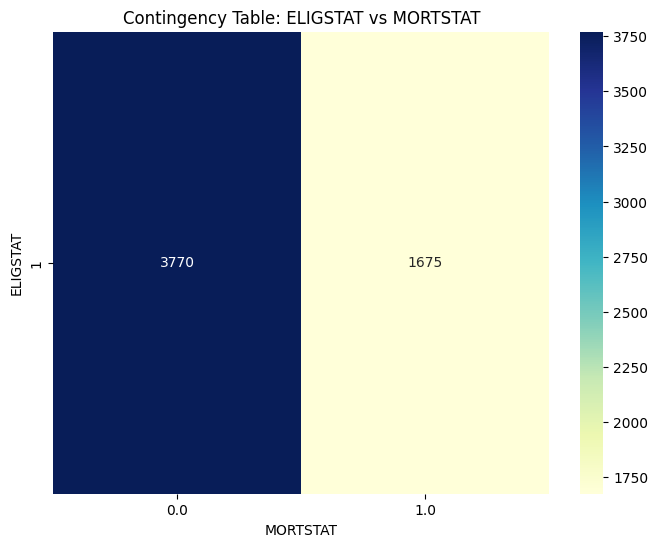

In [24]:
#Contingency Table
ct = pd.crosstab(X_interesting['ELIGSTAT'], X_interesting['MORTSTAT'])
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: ELIGSTAT vs MORTSTAT')
plt.show()

The contingency table shows that categorical variable ELIGSTAT is only 1 when there is a MORTSTAT value. This is because when ELIGSTAT = 2, there is no MORTSTAT value, because this means the patient is under 18, so we cannot get their MORTSTAT value. Similarly, if ELIGSTAT = 3, the patient is ineligible, so we won't have a MORTSTAT value for them. Finally, MORTSTAT = 0 over 2x the amount of time MORTSTAT = 1. This means there over twice the amount of people alive than deceased.  

### Part 2: k-NN classification/regression, write-up (50/100 pts)

Submit a notebook that clearly addresses the following, using code and markdown chunks:

1. Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis? (10/100 pts)
2. Describe the variables you selected to predict mortality and life expectancy, and the rationale behind them. Analyze your variables using describe tables, kernel densities, scatter plots, and conditional kernel densities. Are there any patterns of interest to notice? (10/100 pts)
3. Using your variables to predict mortality using a k-Nearest Neighbor Classifier. Analyze its performance and explain clearly how you select. (10/100 pts)
4. Using your variables to predict life expectancy using a k-Nearest Neighbor Regressor. Analyze its performance and explain clearly how you select. (10/100 pts)
5. Describe how your model could be used for health interventions based on patient characteristics. Are there any limitations or risks to consider? (10/100 pts)

## Question 1

The data for this project is sourced from the National Health and Nutrition Examination Survey (NHANES) for the 1999–2000 cycle, linked with the National Death Index (NDI) through the CDC’s Linked Mortality File.

Who collected the data and why? 
 - The data was collected by the Centers for Disease Control and Prevention (CDC) and the National Center for Health Statistics (NCHS). The purpose of NHANES is to assess the health and nutritional status of adults and children in the US through a combination of interviews and physical examinations. This specific 1999–2000 dataset is used because it provides the longest "follow-up window," allowing us to see mortality outcomes over a span of 20 years.

What is an observation? 
 - An observation (a single row) represents one unique individual surveyed by the CDC. Each individual is identified by a sequence number (SEQN). For our analysis, each observation includes their demographic profile, their self-reported nutritional intake (macronutrients like proteins and carbs), and their mortality status.

Missing Data and Impact 
 - Significant missing data was found in the nutritional files (DRXTOT.xpt) for certain nutrients. Because the k-NN algorithm relies on calculating the "distance" between points in space, missing values are very problematic as they act as gaps in the data. To ensure the model functions, we dropped columns with lots of missing values and focused on the core macronutrients (calories, proteins, carbs, and fat) where data was most complete.

### Known Limitations

Self-Reporting Bias
 - Nutritional data is based on 24-hour dietary recall, which is often subject to memory errors or under-reporting from patients.
Survival Bias
  - This data only tracks those who were alive and able to participate in the 1999–2000 survey, so it does not account for people who may have died shortly before the survey began.
Confounding Variables
  - While we use nutrition to predict mortality, other factors not in our X_interesting list (like smoking, exercise, or genetics) also strongly influence life expectancy.

## Question 2

The variables that we chose to work with to predict mortality and ife expectancy are calories, proteins, carbs, and fats. We decided to use these variables because of how broad macro nutrients are, and that they are all generally linked to each other (ex, look at protein rather than type of fish eaten, covers broader spectrum, pizza would link carbs and fat together, etc). We felt that macro nutrients would give an overarching view of the a diet, rather than narrowing it down too closely to specific foods, hence our choice. Not only that, diet is generally closely related to health, so it may lead to some interesting patterns to arise.

In [25]:
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') 
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") 
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") 


food = pd.read_sas("DRXTOT.xpt", format="xport") 
print(food.head())
X = df.merge(food, on="SEQN", how="left") 
X.head()


   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,DRQ370QQ,DRD370R,DRQ370RQ,DRD370S,DRQ370SQ,DRD370T,DRQ370TQ,DRD370U,DRQ370UQ,DRD370V
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
X_interesting = X.loc[:,['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT'] ]
X_interesting.head()

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
0,2,NaN,NaN,31.0,1358.88,31.96,250.36,27.24
1,1,1.0,177.0,926.0,2463.00,123.16,350.37,71.95
2,2,NaN,NaN,126.0,1517.69,40.19,233.63,49.94
3,2,NaN,NaN,23.0,1474.93,56.16,191.03,56.20
4,1,0.0,244.0,597.0,2658.14,97.13,253.98,114.52


In [27]:
# describe table
X_interesting.describe()

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
count,9965.000000,5445.000000,5445.000000,9.141000e+03,8.725000e+03,8.725000e+03,8.725000e+03,8.725000e+03
mean,1.453889,0.307622,202.314601,3.453502e+02,1.975533e+03,7.115863e+01,2.586785e+02,7.201394e+01
std,0.498499,0.461551,67.137767,2.835316e+02,9.900975e+02,4.062756e+01,1.362553e+02,4.284108e+01
min,1.000000,0.000000,0.000000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
25%,1.000000,0.000000,194.000000,1.290000e+02,1.304850e+03,4.402000e+01,1.653400e+02,4.195000e+01
50%,1.000000,0.000000,235.000000,2.280000e+02,1.797800e+03,6.389000e+01,2.351400e+02,6.363000e+01
75%,2.000000,1.000000,242.000000,5.500000e+02,2.440150e+03,8.938000e+01,3.237300e+02,9.188000e+01
max,3.000000,1.000000,250.000000,1.019000e+03,9.656670e+03,4.610200e+02,1.513960e+03,4.282300e+02


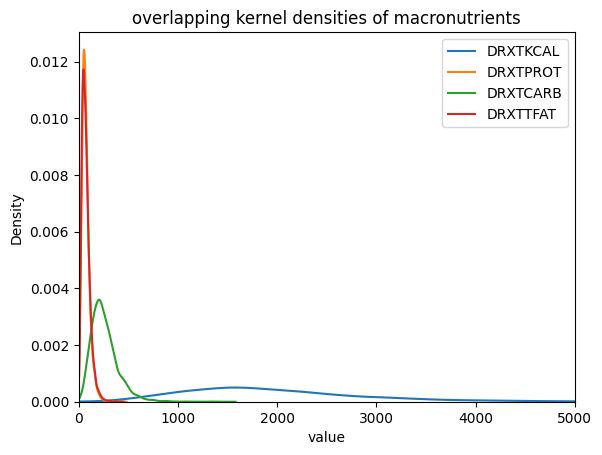

In [28]:
# Kernel density plot

import seaborn as sns
import matplotlib.pyplot as plt

nutrients = ['DRXTKCAL','DRXTPROT','DRXTCARB','DRXTTFAT']

plt.figure()

for var in nutrients:
    sns.kdeplot(X_interesting[var], label=var, fill=False)
plt.xlim(0, 5000)

plt.legend()
plt.title('overlapping kernel densities of macronutrients')
plt.xlabel('value')
plt.show()

In this density plot, we can see that variables protein and fat have a similar distribution (peaking early and high), while calories in total has the lowest, flattest distribution. 
Shows - 
Protein & fat: Most people eat roughly similar amounts = tight clustering.
Calories: People vary a lot more → some eat way more = spread out curve.

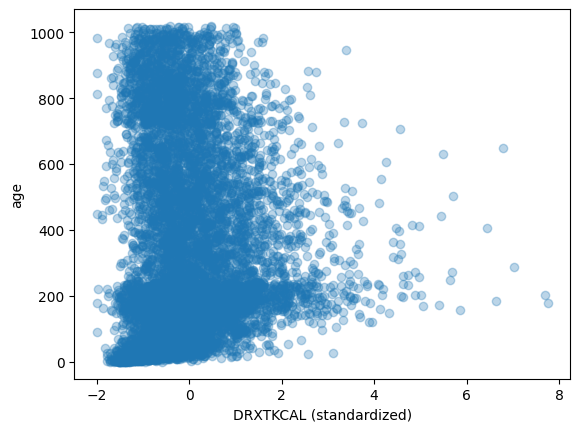

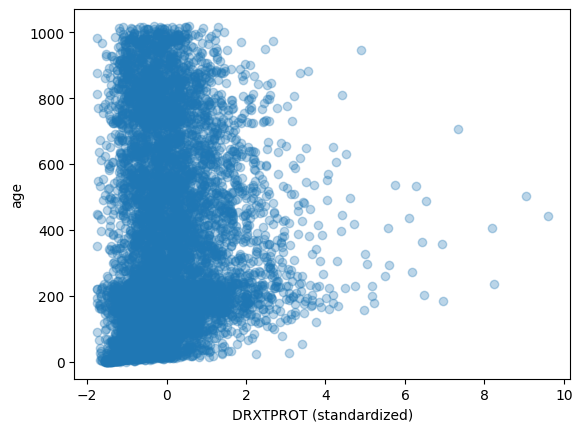

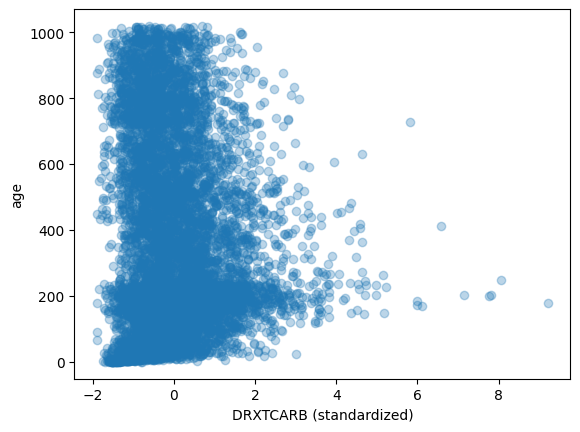

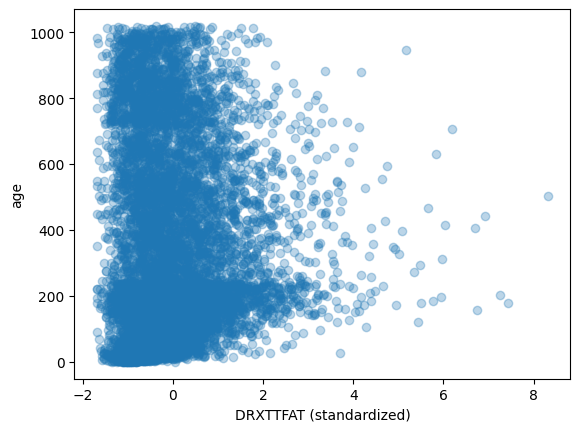

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X_interesting[nutrients])
scaled_df = pd.DataFrame(scaled, columns=nutrients)

for var in nutrients:
    plt.figure()
    plt.scatter(scaled_df[var], X_interesting['RIDAGEEX'], alpha=0.3)
    plt.xlabel(var + " (standardized)")
    plt.ylabel('age')
    plt.show()


These scatter plots show that...

- There is little linear relationship between age and individual macronutrients
- Intake varies widely at all ages
- Age alone doesn’t strongly determine macro intake

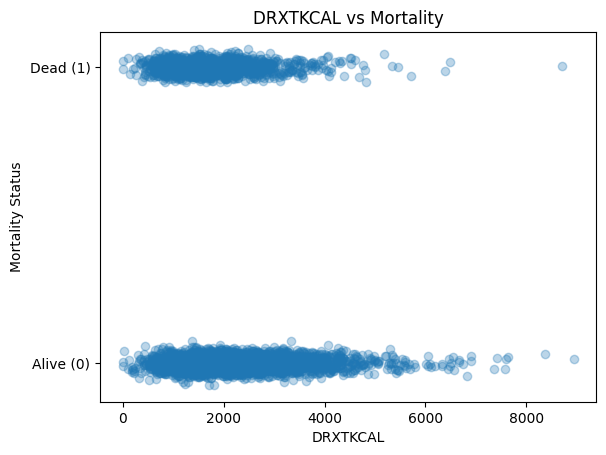

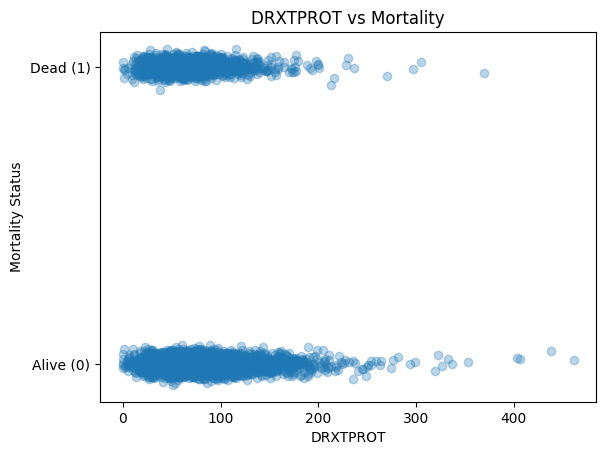

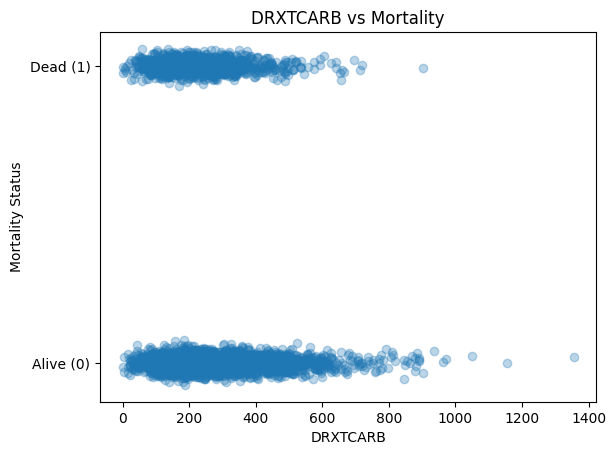

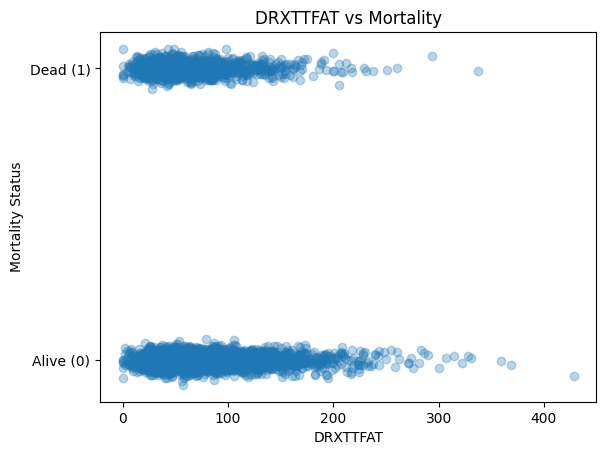

In [30]:
import numpy as np

nutrients = ['DRXTKCAL','DRXTPROT','DRXTCARB','DRXTTFAT']

for var in nutrients:
    plt.figure()
    
    # add small random noise (jitter) to mortality axis
    jitter = np.random.normal(0, 0.02, size=len(X_interesting))
    y_jittered = X_interesting['MORTSTAT'] + jitter
    
    plt.scatter(X_interesting[var], y_jittered, alpha=0.3)
    
    plt.yticks([0, 1], ['Alive (0)', 'Dead (1)'])
    plt.xlabel(var)
    plt.ylabel('Mortality Status')
    plt.title(f'{var} vs Mortality')
    plt.show()


These scatter plots show that the distribution of nutrients extend further on the x axis for those that are alive, and not as far for those that are dead. This shows that the highest values of nutrients are more common among those who are alive. While the data alone doesn't show why this may be, poor health can contribute to poor nutrition, so those that are ill may be eating less. This pattern could indicate survivorship bias in the data. 

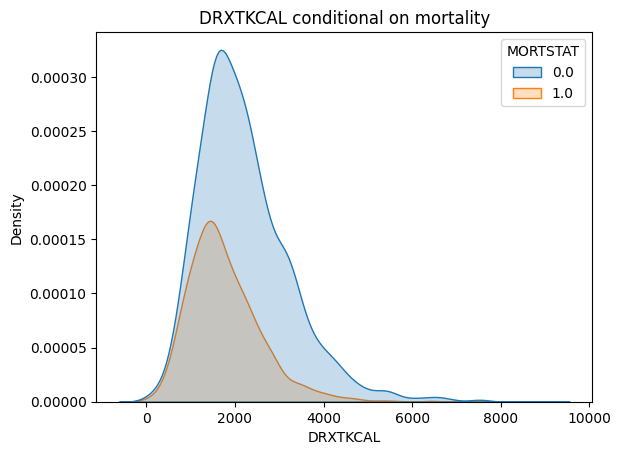

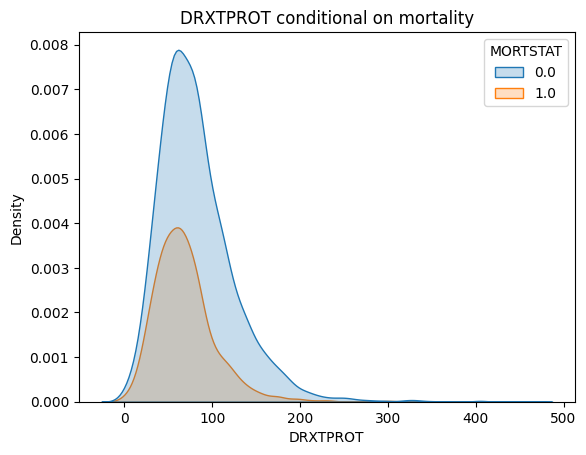

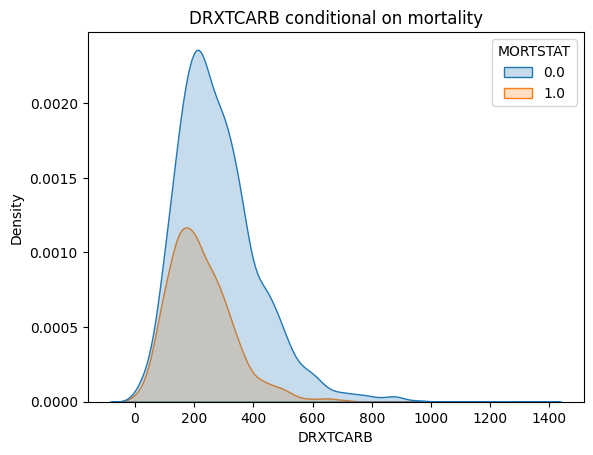

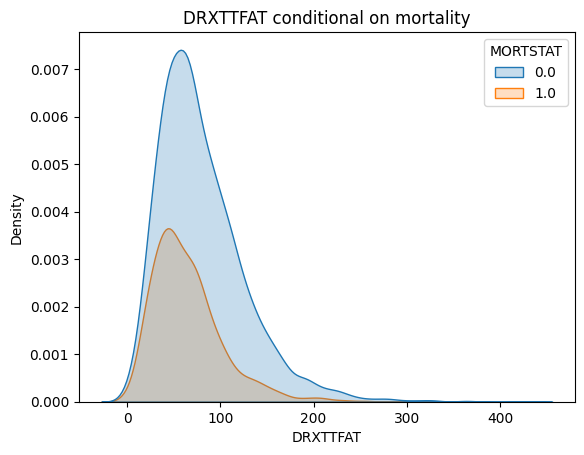

In [31]:
for var in nutrients:
    plt.figure()
    sns.kdeplot(data=X_interesting, x=var, hue='MORTSTAT', fill=True)
    plt.title(f'{var} conditional on mortality')
    plt.show()


These density plots all follow very similar patterns, peaking at the same point, however, the alive group peaks much higher at that point, being more concentrated around that level. The spread looks very similar between the two groups. This means that the nutrient intake is similar for the two groups, with the dead group's being slightly lower. 

## What did we learn from these different plots?

Based on these patterns, there seems to be a connection between more nutrient intake and being alive, while a lower intake may indicate the status of death. We also learned that nutritional intake isn't closely related to age (varies widely across all ages), and that between protein and fats, people tend to eat similar amounts, while calorie intake varies much, much more. 

## Question 3

In [32]:
# Explaining how to find k by annotating this code, see code notes as a step by step as to how we found our k

from sklearn.model_selection import train_test_split # imports we need
from sklearn.preprocessing import StandardScaler

data = X_interesting[['DRXTKCAL','DRXTPROT','DRXTCARB','DRXTTFAT','MORTSTAT']] # defining the specific variables we will use for this model
data = data.dropna() # dropping any NaN values to clean things up 

X = data[['DRXTKCAL','DRXTPROT','DRXTCARB','DRXTTFAT']] # defining variables we will be using to find an outcome
y = data['MORTSTAT'] # defining the outcome we are trying to predict

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # splitting data into 80% (to train on) and 20% (to test on)
)


# scaling the features - want everything to be scaled the same (so theres no crazy scales that distort things)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # scaled our x training
X_test_scaled = scaler.transform(X_test) # scaled our y testing




In [33]:
# Finding k and getting scores
from sklearn.pipeline import Pipeline # imports we need to run these things
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_values = range(1, 31) # the range of k values we will test out
cv_scores = [] # empty list to collect the scores from running this

for k in k_values:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    
    scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean()) # runs through each possible k, finds the cv score for each

best_k = k_values[np.argmax(cv_scores)] # determines the best performing k out of all the ones we tested
print("Best k:", best_k) # prints the best one out of all those


Best k: 29


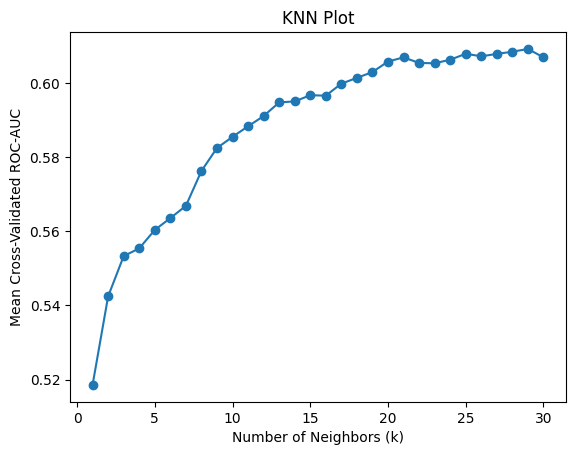

In [34]:
# plotting how well k performs 
# (we can see our k=29 appears to perform the best (highest ROC-AUC, based on the graph)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Cross-Validated ROC-AUC")
plt.title("KNN Plot")
plt.show()


In [35]:
# getting the stats on our final model, looking at the accuracy of our k, the ROC-AUC, confusion matrix, and a brief report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.6929547844374343
Test ROC-AUC: 0.6108613851860561

Confusion Matrix:
 [[643  30]
 [262  16]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.96      0.81       673
         1.0       0.35      0.06      0.10       278

    accuracy                           0.69       951
   macro avg       0.53      0.51      0.46       951
weighted avg       0.60      0.69      0.61       951



### Analysis of this performance...

The K Nearest Neighbor classifier achieved a test ROC-AUC of 0.611, indicating modest predictive ability. While performance was better than random guessing (AUC = 0.5), the model demonstrates that nutrient intake variables alone provide limited information for predicting mortality. This suggests that mortality is influenced by additional demographic and health related factors not included in the model.

The steady increase in cross validated performance as k increased suggests that small k values overfit noise in the data. The plateau at larger k values indicates that heavy smoothing is beneficial, consistent with a weak signal setting.

So, in all, nutrient data may not provide enough correlation between life and death to be able to draw super accurate predictions every time. 

## Question 4

In [36]:
# Building a kNN regressor
# like the previous question, the process of finding the k will be explained through the code annotation
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['DRXTKCAL','DRXTPROT','DRXTCARB','DRXTTFAT']]  # features we will use to predict target
y = data['MORTSTAT']  # target - what we are trying to predict

X_train, X_test, y_train, y_test = train_test_split( # splitting into training and test (80/20)
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler() # make sure the features are scaled 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# going to use grid search to find the best k
param_grid = {'n_neighbors': range(1, 35), 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

# best kNN model
knn = grid.best_estimator_

# train the model
knn.fit(X_train_scaled, y_train)

# predict on test set
y_pred = knn.predict(X_test_scaled)

# evaluate how well this model performed
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {grid.best_params_}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

# some more parameters chosen by GridSearchCV
print(f"Optimal number of neighbors (k): {grid.best_params_['n_neighbors']}")
print(f"Optimal weighting method: {grid.best_params_['weights']}")
print(f"Best mean CV R² score: {grid.best_score_:.4f}")


Best parameters: {'n_neighbors': 33, 'weights': 'uniform'}
Test MSE: 0.2068
Test R^2: 0.0145
Optimal number of neighbors (k): 33
Optimal weighting method: uniform
Best mean CV R² score: 0.0208


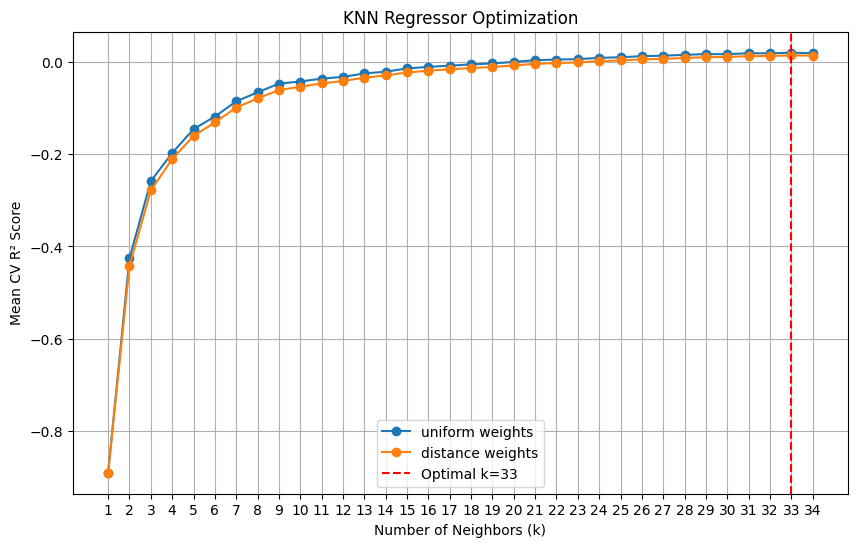

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# extract results from GridSearchCV (done above)
results = grid.cv_results_
k_values = param_grid['n_neighbors']
uniform_scores = []
distance_scores = []

# collect mean test scores for each weight type
for k in k_values:
    # uniform weights
    mask_uniform = (results['param_n_neighbors'] == k) & (results['param_weights'] == 'uniform')
    uniform_scores.append(results['mean_test_score'][mask_uniform][0])
    # distance weights
    mask_distance = (results['param_n_neighbors'] == k) & (results['param_weights'] == 'distance')
    distance_scores.append(results['mean_test_score'][mask_distance][0])

# plotted
plt.figure(figsize=(10,6))
plt.plot(k_values, uniform_scores, marker='o', label='uniform weights')
plt.plot(k_values, distance_scores, marker='o', label='distance weights')
plt.axvline(x=33, color='red', linestyle='--', label='Optimal k=33')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV R² Score')
plt.title('KNN Regressor Optimization')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


### Summary of what we did, and what it means

We ran GridSearchCV with a range of n_neighbors (ex 1–20 or more) and two weighting options- 'uniform' and 'distance'. For each combination, it performed 5 fold cross validation:
- Split the training data into 5 folds
- Trained on 4 folds, validated on 1 fold
- Repeated so every fold was used as validation once
- Calculated the R^2 score for each fold, then averaged -> mean CV R^2 score

GridSearchCV picked the combination that maximized the mean CV R^2 score. Using 33 neighbors and averaging them equally (uniform) gave the best predictive performance on cross validation.

Test MSE = 0.2068
- Lower MSE means predictions closer to the real mortality values.

Test R^2 = 0.0145
- Model is barely better than predicting the average mortality for everyone...

Best mean CV R^2 score = 0.0208
- Slightly higher than test R^2 -> model did okay on training folds, but not great overall.

KNN chose a large k (33), so this smooths out predictions, reduces variance, and avoids overfitting. If it's a weakly predictive feature set, a high k is common.

Low R² and modest MSE indicates that the nutritional features (DRXTKCAL (calories), DRXTPROT (protein), etc) don’t seem very predictive of mortality (this was also seen in the previous model, question 3, so makes sense). It seems like the features aren’t strongly related to mortality based on this, or overlap hardcore. 

Note about uniform weights- 
- Every neighbor contributes equally, which makes sense here because none of the features are strongly distinguishing some neighbors as more informative

## Question 5

### Health Interventions and Application of our Model

Our model looks at nutrient intake (calories, proteins, fats, and carbohydrates) to predict mortality risk (MORTSTAT) and life expectancy (PERMTH_INT). These predictors can help profile patients based on their individual data, providing valuable life or death information. 

Identifying Patients at Risk
 - The k-nn classifier can be used by doctors to pinpoint patients whose "neighbors" with similar nutrional values have a high mortality rate. If a significant majority of these neighbors are labeled as "Deceased (1)", the patient is marked as high-risk. These patients could then be flagged and prioritized for treatment, preventative screens, therapy/counseling, etc.

Modifying Patient Diets
 - Our k-NN regression model can be used to design personalized diet changes by identifying  patients' "neighbors" with longevity. We can find individuals with similar characteristics who achieved longer follow-up times (PERMTH_INT), allowing doctors to make customized, data-driven recommendations for changes in patient diets. Specifically, a doctor could suggest adjusting a patient's macronutrient levels to more closely mirror the 'neighbor' profiles associated with better mortality outcomes.


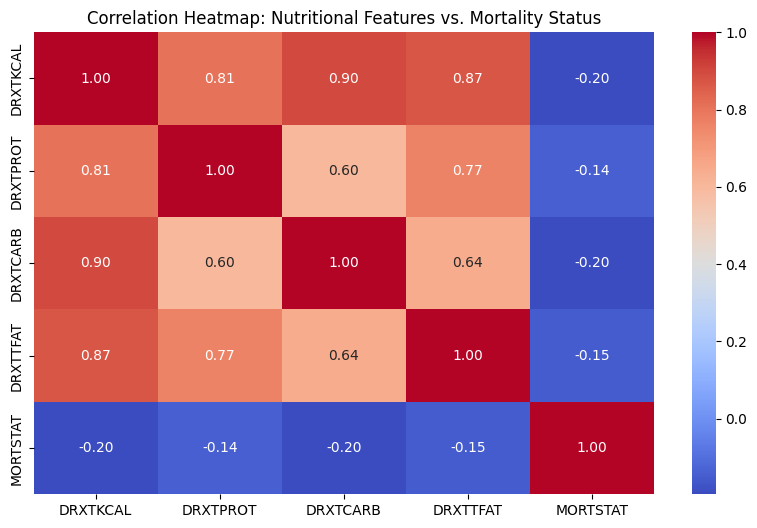

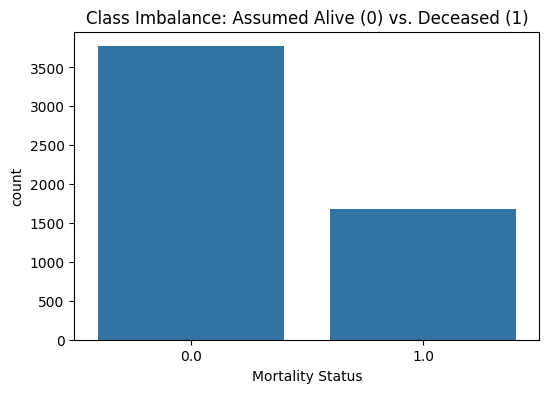

In [42]:
features_to_check = ['DRXTKCAL', 'DRXTPROT', 'DRXTCARB', 'DRXTTFAT']
target = 'MORTSTAT'
corr_matrix = X_interesting[features_to_check + [target]].corr()

# Show relationship 
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Nutritional Features vs. Mortality Status")
plt.show()

# Visualize distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=X_interesting, x='MORTSTAT')
plt.title("Class Imbalance: Assumed Alive (0) vs. Deceased (1)")
plt.xlabel("Mortality Status")
plt.show()

### Limitations and Risks

Low Feature Predictions
 - As shown in the heatmap above, the correlation between nutritional intake (like fats or proteins) and mortality status is extremely low (near 0). This suggests that nutrition alone is not a strong enough predictor of mortality status in this dataset.

Correlation and Causation
 - Correlation does not equal causation. A patient could have a low nutrient intake because they are already ill, making their diet a symptom of mortality status and not a cause.

Class Imbalance
 - The bar chart shows a significantly higher number of "Alive (0)" participants than "Deceased (1)". This is a risk for $k$-NN because the algorithm might default to predicting "Alive (0)" for almost all patients because most "neighbors" in any given area of the data space are alive.

Proxy Variables
 - There is a risk that a health intervention might focus on a nutrient that could be a proxy variable for something else. For example, high protein intake might correlate with wealth (ability to buy meat), and wealth (not the protein itself) might be what is extending life.

Data Sparsity
 - k-NN suffers from the "curse of dimensionality." With many nutritional features and lots of missing data (as seen in the DRXTOT.xpt file), the "distance" between neighbors becomes less meaningful, leading to less reliable predictions.